# Загрузка датасета и первый взгляд

In [ ]:
!mkdir ./data
!wget https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem7/zhestov.ea%40phystech.edu.csv -O data/zhestov.ea@phystech.edu.csv

--2021-03-24 08:02:03--  https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem7/zhestov.ea%40phystech.edu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 280043 (273K) [text/plain]
Saving to: ‘data/zhestov.ea@phystech.edu.csv’

data/zhestov.ea@phy 100%[===================>] 273.48K  --.-KB/s    in 0.03s   

2021-03-24 08:02:04 (10.4 MB/s) - ‘data/zhestov.ea@phystech.edu.csv’ saved [280043/280043]



In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('data/zhestov.ea@phystech.edu.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,33.464385,-1.761398,-0.156257,-0.005979,0.860942,0.091872,-0.331193,0.749937,0.019989,0.032373,0.319947
1,33.464500,-1.303103,0.387844,-1.128526,1.457206,0.812469,-0.022561,-2.500210,-1.444416,-0.235715,0.925951
2,33.464510,-0.249461,1.443965,0.620882,0.470192,0.988734,0.028974,-0.640343,-0.405336,0.084876,0.031681
3,33.464353,-0.230755,-0.765686,1.712833,-0.874092,0.423669,-1.889826,0.014605,-0.661475,0.213601,1.189151
4,33.464234,0.526141,1.154553,-1.136941,-0.689502,0.684815,0.901370,-1.486596,-0.721248,0.468192,2.423638


In [ ]:
column_names = list(map(lambda num: f"X{num - 1}", data.columns))
column_names[0] = 'Y'
column_names
data.columns = column_names
data.describe()

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,33.218025,0.072231,-0.051437,-0.060313,0.032660,0.006941,-0.024947,0.006426,-0.028679,-0.020293,-0.026283
std,5.584915,1.016500,0.998119,0.983231,1.005172,0.993745,0.991906,0.998349,0.961597,1.003385,0.991686
min,0.010000,-3.130053,-3.287880,-2.842902,-2.870782,-2.696203,-3.949313,-2.933166,-3.370755,-3.420011,-3.275969
25%,31.158585,-0.622599,-0.753558,-0.709180,-0.669469,-0.667142,-0.732571,-0.644894,-0.649648,-0.690803,-0.688340
50%,33.464422,0.071710,-0.058918,-0.022007,0.035155,0.002624,-0.052348,0.013527,0.001218,-0.042588,-0.005404
75%,35.490151,0.775350,0.649182,0.604349,0.697111,0.669500,0.693689,0.745126,0.625735,0.671355,0.647797
max,53.849895,3.058372,3.327818,2.980125,3.318213,3.409064,3.167181,2.965234,3.022946,2.980623,3.057821


In [ ]:
X = data.drop("Y", axis=1)
y = data["Y"]
print(X.shape, y.shape)

(1000, 10) (1000,)


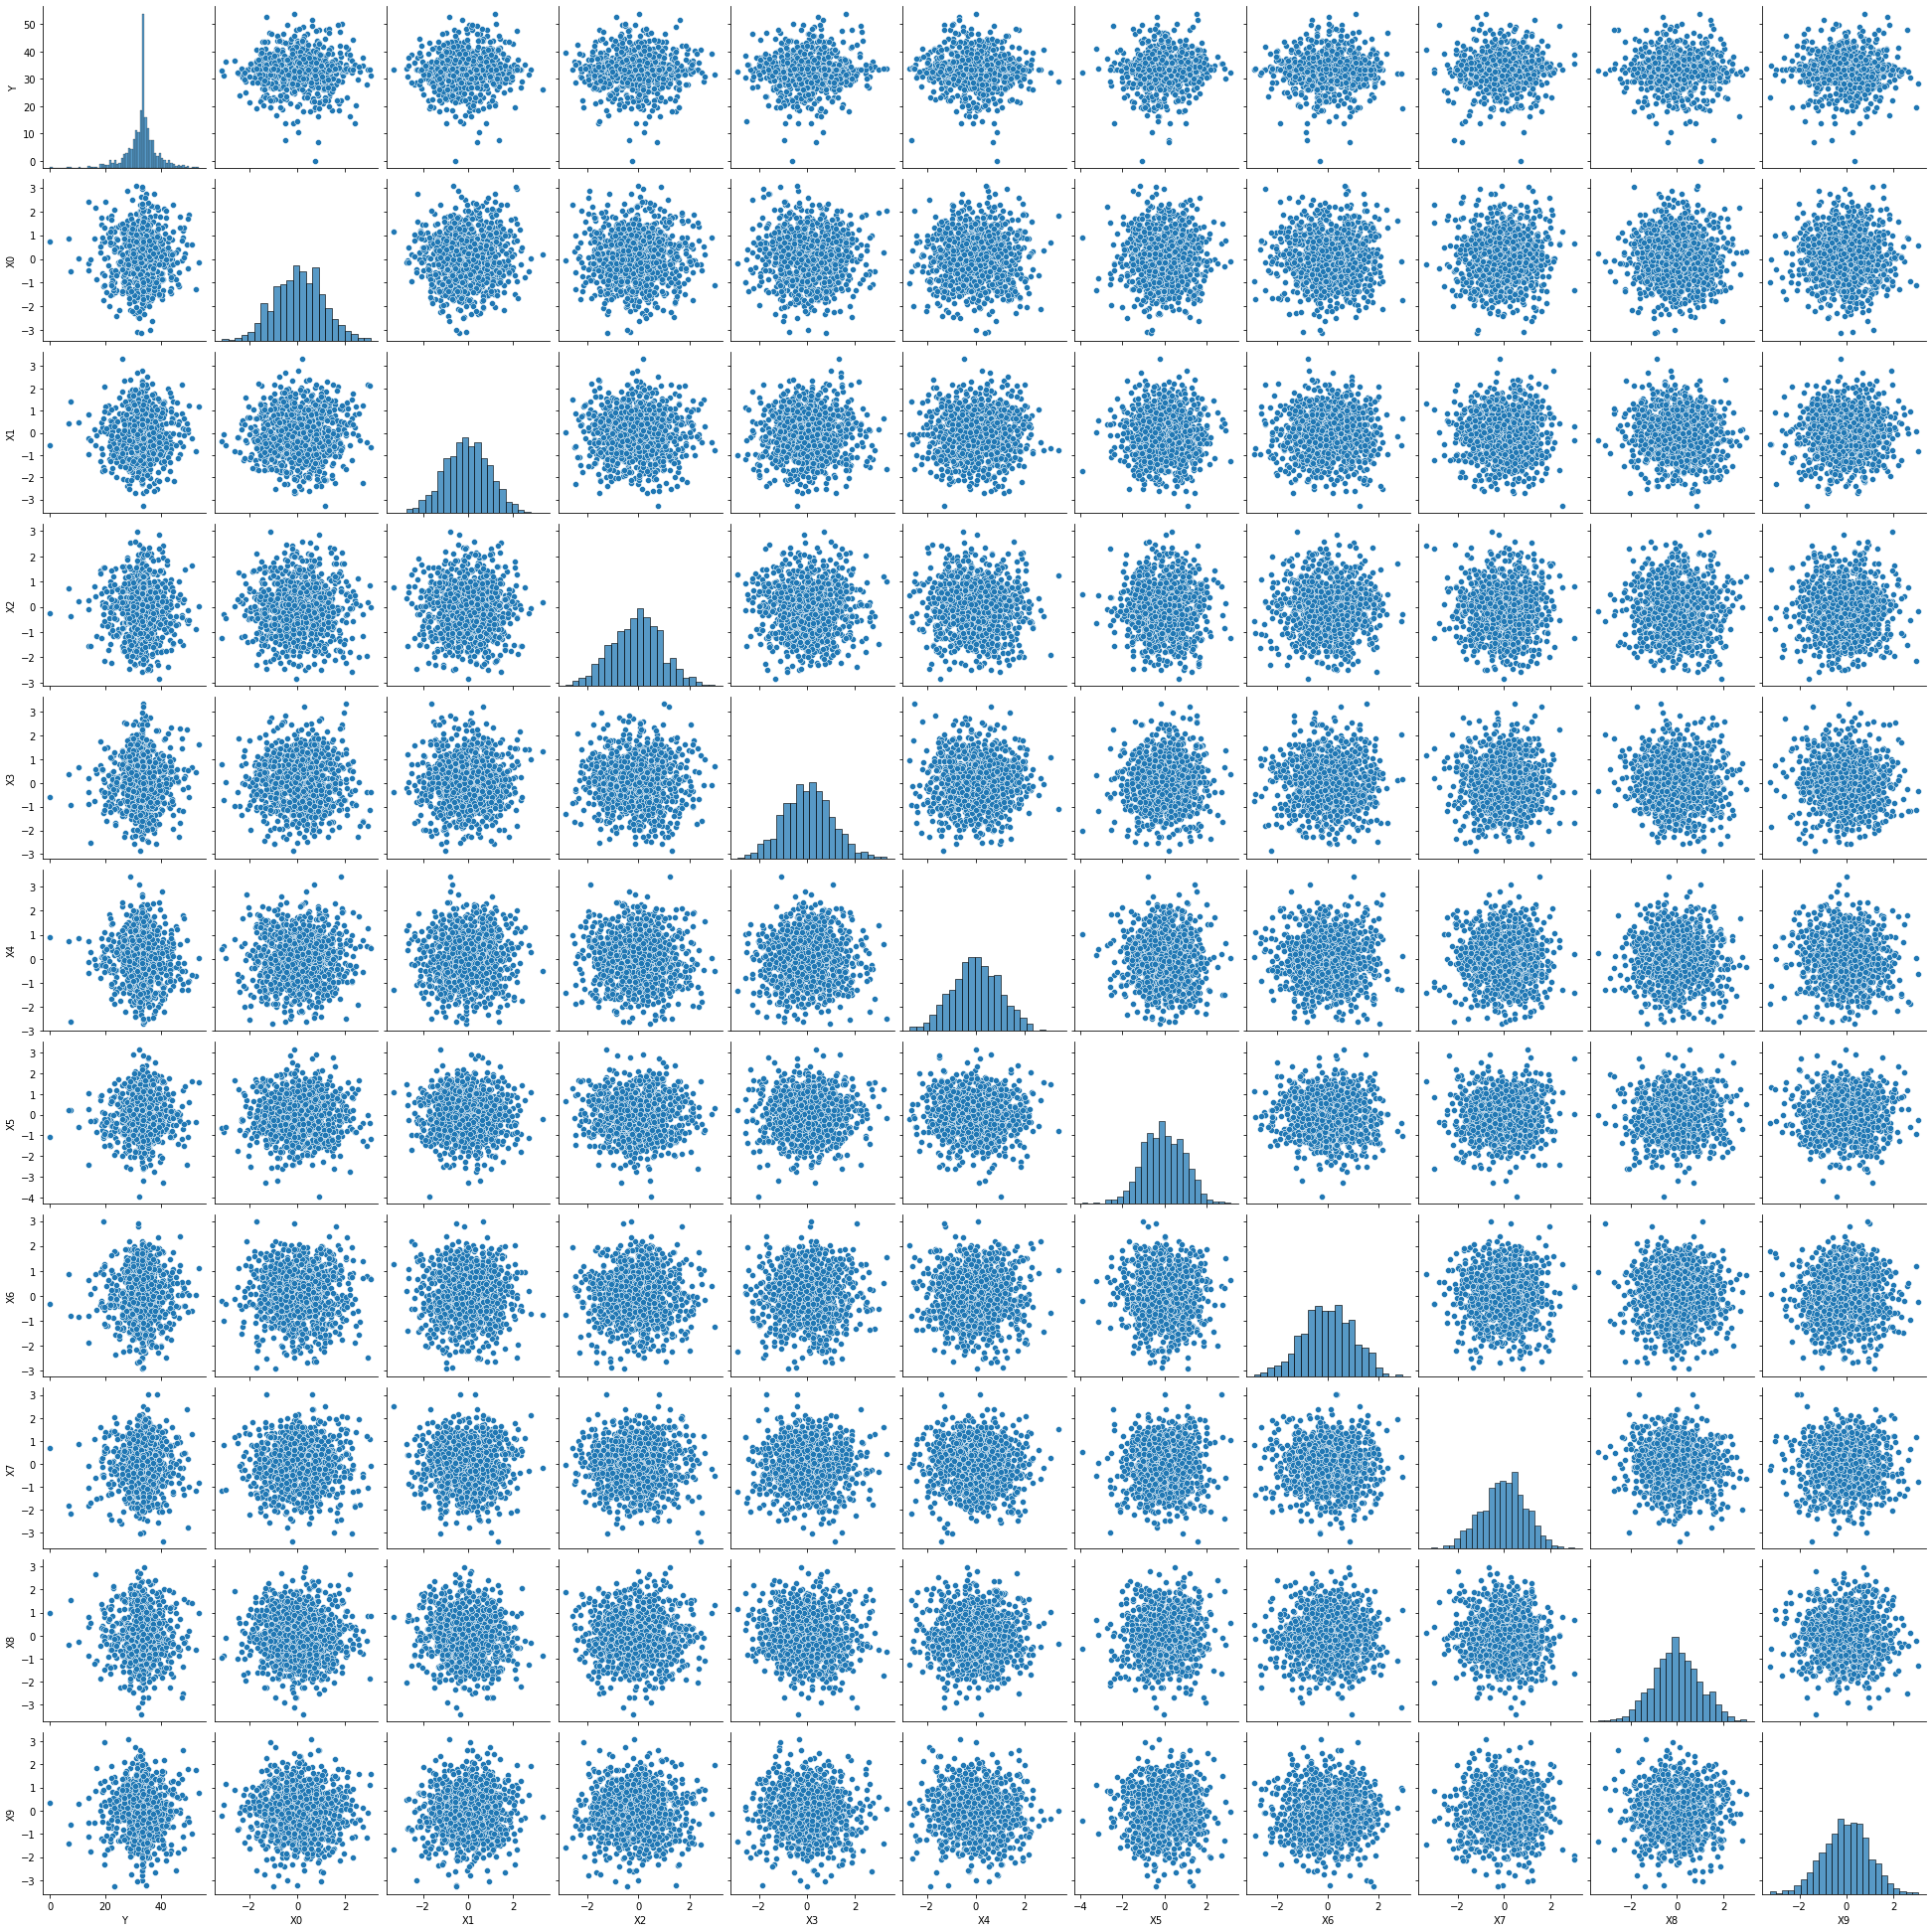

In [ ]:
sns.pairplot(data)

# Задание

## Вопрос 1
Постройте линейную модель $Y$ от $X$ и свободного коэффициента. Проверьте, есть ли гетероскедастичность в выборке с использованием критерия Бройша-Пагана (использовать F-test, см. справку по критерию)

In [ ]:
lin_model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7393
Date:                Wed, 24 Mar 2021   Prob (F-statistic):              0.688
Time:                        08:02:19   Log-Likelihood:                -3134.8
No. Observations:                1000   AIC:                             6292.
Df Residuals:                     989   BIC:                             6346.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2336      0.178    186.452      0.000      32.884      33.583
X0             0.0641      0.175      0.367      0.713      -0.278       0.407
X1             0.2232      0.178      1.253      0.211      -0.126       0.573
X2             0.0331      0.180      0.184      0.854      -0.321       0.387
X3             0.1000      0.177      0.565      0.572      -0.247       0.447
X4            -0.1954      0.179     -1.092      0.275      -0.546       0.156
X5             0.2834      0.179      1.580      0.114      -0.069       0.635
X6             0.1130      0.177      0.637      0.524      -0.235       0.461
X7             0.0918      0.185      0.498      0.619      -0.270       0.454
X8            -0.1192      0.178     -0.669      0.503      -0.469       0.230
X9             0.0796      0.179      0.445      0.656      -0.271       0.430
==============================================================================
Omnibus:                      127.543   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              545.246
Skew:                          -0.523   Prob(JB):                    3.99e-119
Kurtosis:                       6.463   Cond. No.                         1.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Гетероскедастичность: одно из нарушений предпосылок Г-М, когда дисперсия ошибки зависит от номера наблюдения
2. Тест Бройша-Пагана: похож на тест Уайта, но не только с линейной зависимостью. Берём ошибки каждого фита (residuals), интерполируем многочленом (вроде через MLE), понимаем, константа это или нет.\
^ тут может быть написана хрень, ибо я писал это в 3 утра.

`het_breuschpagan` выдаёт нам p-value для f-stat 4м числом c $H_0$ о том, что гетероскедастичности нет.

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [ ]:
het_breuschpagan(lin_model.resid, X)[3] > 0.05

True

У меня гомоскедастичность.

## Вопрос 2
Оптимальное значение $\lambda$ для преобразования Бокса-Кокса на переменную $Y$ (использовать `scipy.stats`)

In [ ]:
from scipy import stats as st

Вроде бы преобразование Бокса-Кокса это что-то про приведение данных к нормальным.

`st.boxcox` выдаёт оптимальную $\lambda$ вторым параметром.

In [ ]:
print(round(st.boxcox(y)[1], 3))

1.492


## Вопрос 3
Постройте линейную модель $Y$ от $X$ и свободного коэффициента для первых 100 элементов выборки. Сколько переменных являются избыточными согласно t-критерию? Поправку на множественность гипотез проигнорировать\

В смысле "проигнорировать"?..

In [ ]:
new_model = sm.OLS(exog=sm.add_constant(X[0:100]), endog=y[0:100]).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9838
Date:                Wed, 24 Mar 2021   Prob (F-statistic):              0.463
Time:                        08:02:31   Log-Likelihood:                 782.61
No. Observations:                 100   AIC:                            -1543.
Df Residuals:                      89   BIC:                            -1515.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.4644   1.08e-05   3.09e+06      0.000      33.464      33.464
X0         -2.402e-05   1.03e-05     -2.325      0.022   -4.46e-05   -3.49e-06
X1         -8.399e-06   1.08e-05     -0.776      0.440   -2.99e-05    1.31e-05
X2         -2.037e-06   1.18e-05     -0.173      0.863   -2.54e-05    2.14e-05
X3           1.01e-05   1.12e-05      0.900      0.370   -1.22e-05    3.24e-05
X4         -1.108e-05   9.73e-06     -1.139      0.258   -3.04e-05    8.25e-06
X5         -1.992e-06   1.12e-05     -0.177      0.860   -2.43e-05    2.03e-05
X6          5.141e-06   9.25e-06      0.556      0.580   -1.32e-05    2.35e-05
X7         -6.753e-06   1.15e-05     -0.586      0.560   -2.97e-05    1.62e-05
X8          1.312e-06   1.07e-05      0.122      0.903      -2e-05    2.26e-05
X9         -1.581e-07   1.11e-05     -0.014      0.989   -2.22e-05    2.19e-05
==============================================================================
Omnibus:                        0.037   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.982   Jarque-Bera (JB):                0.017
Skew:                          -0.011   Prob(JB):                        0.992
Kurtosis:                       2.940   Cond. No.                         1.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Похоже он хочет $P > |t|$ с уровнем значимости 0.05, у меня это все 10 переменных кроме разве что 1й. Посмотрим на графички, а то пока выглядит так себе.

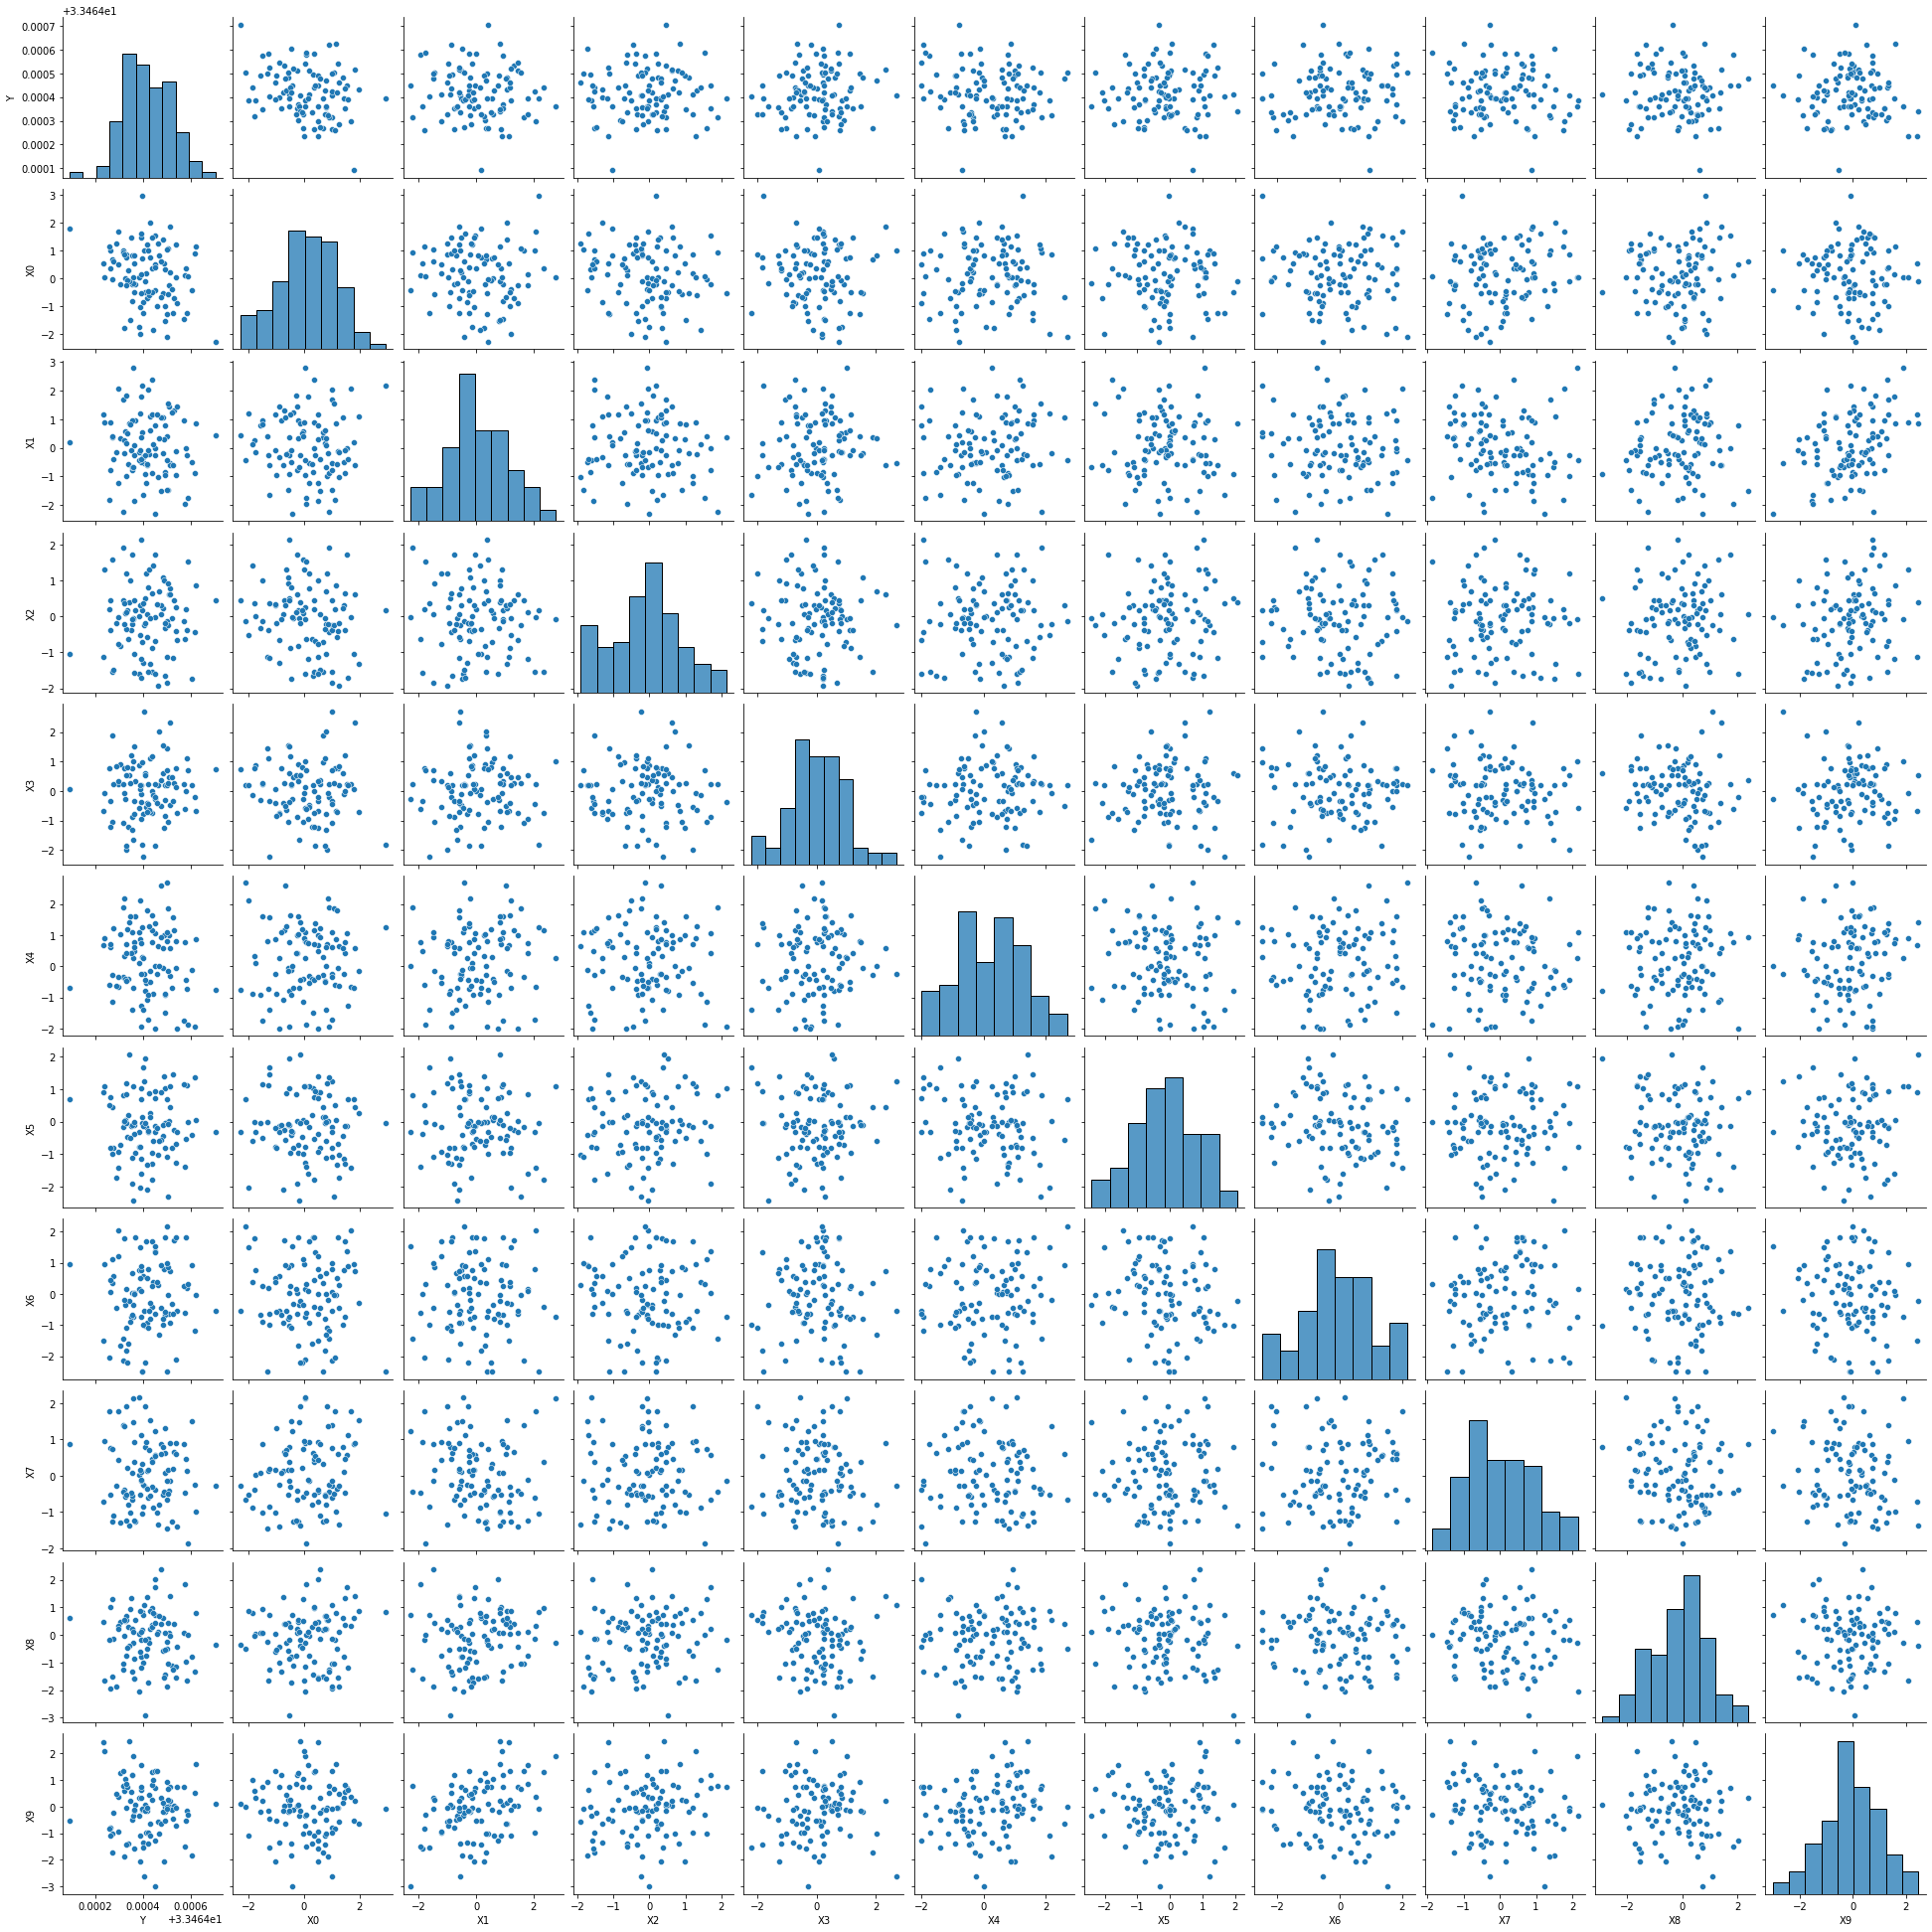

In [ ]:
sns.pairplot(data[0:100])

Ладно, возможно и правда зависимости почти везде незначимы. 9 незначимых переменных.

## Вопрос 4
Имеет ли смысл данная модель согласно F-критерию?

Грабовой сказал, что константа тут не нужна

In [ ]:
new_model.f_test('X0 = X1 = X2 = X3 = X4 = X5 = X6 = X7 = X8 = X9 = 0').summary()

'<F test: F=array([[0.98376228]]), p=0.4634013086421723, df_denom=89, df_num=10>'

In [ ]:
new_model.f_pvalue > 0.05

True

Модель имеет смысл, ибо нулевая гипотеза, что все переменные 0 имеет pvalue больше 0.05

## Вопрос 5
Можно ли обнулить первые четыре переменные согласно критерию Вальда?

In [ ]:
new_model.wald_test('X0 = X1 = X2 = X3 = 0').summary()

'<F test: F=array([[1.70573876]]), p=0.1557566950976665, df_denom=89, df_num=4>'

Нельзя обнулить, потому что гипотеза, что первые 4 переменные равны нулю, имеет pvalue больше 0.05